# Clustering - Unsupervised Learning (Denetimsiz, Hedef "y" yok)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [4]:
from sklearn.cluster import KMeans # en yakin komsular
from sklearn.metrics import silhouette_score # kac gruba ayirmak gerekiyor icin kullanilan metrics
#elbow method 

In [5]:
x=df[["Price","Mileage","Cylinder"]] # bunlara göre arabalari gruplara ayirabiliyormuyuz

In [6]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model=KMeans(n_clusters=6)
# niye dört Cluster?
# price cok & kilometre az - lüx, gösteris icin araba cok kullanmiyor

In [8]:
model=model.fit(x)

In [9]:
tahmin=model.predict(x)

In [10]:
tahmin

array([4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4, 4,
       4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 2, 2,
       2, 2, 0, 0, 4, 1, 1, 1, 1, 1, 2, 0, 0, 0, 3, 3, 3, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 3, 3, 1, 1, 1, 5, 5, 5, 5, 5, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 4, 4, 4, 4, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 2, 2, 0, 0,
       0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 4, 4,
       4, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4,

In [11]:
x["clusters"]=tahmin

C:\Users\Kemal\AppData\Local\Temp\ipykernel_17920\3923429746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["clusters"]=tahmin


In [12]:
x.head()

,Price,Mileage,Cylinder,clusters
0,17314.103129,8221,6,4
1,17542.036083,9135,6,4
2,16218.847862,13196,6,4
3,16336.913140,16342,6,2
4,16339.170324,19832,6,2


In [13]:
silhouette_score(x,tahmin)

0.34695805985327044

In [14]:
import matplotlib.pyplot as plt

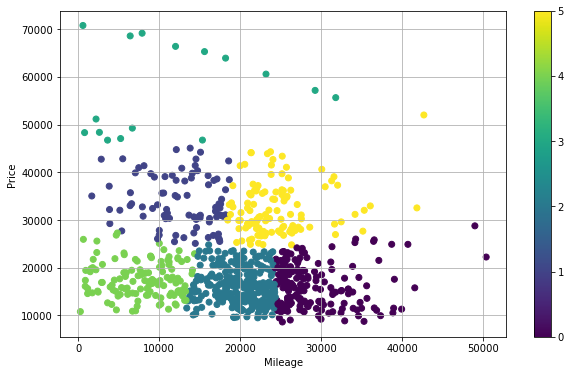

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin);
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.colorbar()
plt.grid()

In [16]:
# elbow method: grubu böle böle artik silhouette_score degismessze en uygun bölme o

In [22]:
allscore = []
allclusters = []
uzakliklar = []

# clustere göre score'in degismesi
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i, " score ",score)
        #score ve uzaklik yukardaki listelere eklememiz lazim
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)
# 5. Cluster da durmamiz lazim, 2 de basladigi icin yani 4

Cluster  2  score  0.4511454152050176
Cluster  3  score  0.41321086070876917
Cluster  4  score  0.4127102907895869
Cluster  5  score  0.3549031875763706
Cluster  6  score  0.34791453047082105
Cluster  7  score  0.3653254232148115
Cluster  8  score  0.3656633187190488
Cluster  9  score  0.37050052899961267
Cluster  10  score  0.364335764464311
Cluster  11  score  0.3556083143823144


In [ ]:
# bunun grafigini cizelim

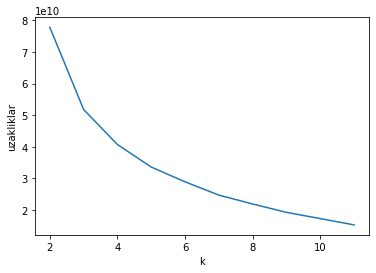

In [25]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar);
#grafik nerde kiriliyor, orda durmamiz gerekiyor

In [ ]:
# elbow metodunun gösterdigi uzere veriyi 4 farkli kümede en ideal oldugunu düsünüyürouz

In [ ]:
# ucuz ve üzerine az km olan 0, ucuz üzerine cok km, pahali ama az km, orta

In [ ]:
# diger makine ögrenmenin metodun farkli, silhoutte_score fazla olmasi basari daha fazla göstermiypr

In [27]:
df[df["Price"]>60000]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
